In [31]:
import pandas as pd
import numpy as np
population = pd.read_csv("data/processed_texas_population_daily.csv", index_col='Year', parse_dates=['Year'])
oni = pd.read_csv("data/processed_oni_data.csv", parse_dates=['Date'])
nfip = pd.read_csv('data/processed_fima_nfip_claims.csv', parse_dates=['dateOfLoss'])


In [32]:
oni.dropna(inplace=True)
oni['Date'] = oni['Date'].dt.to_period('M').dt.to_timestamp()
nfip.dropna(subset=['totalAmountPaid'], inplace=True)
nfip['totalAmountPaid'] = nfip['totalAmountPaid'].apply(lambda x: abs(x) if x < 0 else (1 if x == 0 else x))
nfip['dateOfLoss'] = nfip['dateOfLoss'].dt.to_period('M').dt.to_timestamp()
monthly_claims = nfip.groupby('dateOfLoss')['totalAmountPaid'].sum().reset_index()

df = pd.merge(monthly_claims, oni, left_on='dateOfLoss', right_on='Date', how='inner')
df = pd.merge(df, population, left_on='dateOfLoss', right_index=True, how='inner')

df['claimsPerCapita'] = (df['totalAmountPaid'] / df['Resident Population'])
columns_to_keep = [
    'dateOfLoss',              
    'totalAmountPaid',
    'Resident Population',     
    'claimsPerCapita',         
    'ONI_Total',              
    'ONI_Anomaly'           
]
merged_data = df[columns_to_keep]
print(df.head())
df.to_csv("data/processed_flood_analysis_data.csv", index=False)

  dateOfLoss  totalAmountPaid       Date  ONI_Total  ONI_Anomaly  \
1 1978-02-01          1322.00 1978-02-01      27.09         0.42   
2 1978-03-01          1306.90 1978-03-01      27.08         0.06   
3 1978-04-01         23898.92 1978-04-01      27.14        -0.18   
4 1978-05-01        201252.22 1978-05-01      27.11        -0.31   
5 1978-06-01       1349184.28 1978-06-01      26.98        -0.29   

   Resident Population  claimsPerCapita  
1         1.364877e+07         0.000097  
2         1.367202e+07         0.000096  
3         1.369776e+07         0.001745  
4         1.372267e+07         0.014666  
5         1.374841e+07         0.098134  


/var/folders/2y/d764fpq92556cl5v0l2kjn0r0000gn/T/ipykernel_21364/3528240661.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  nfip['dateOfLoss'] = nfip['dateOfLoss'].dt.to_period('M').dt.to_timestamp()


In [33]:
sum = df[['totalAmountPaid', 'ONI_Total', 'ONI_Anomaly', 'Resident Population' ,'claimsPerCapita']]
summary_statistics = sum.describe()
summary_statistics

,totalAmountPaid,ONI_Total,ONI_Anomaly,Resident Population,claimsPerCapita
count,5.540000e+02,554.000000,554.000000,5.540000e+02,5.540000e+02
mean,3.100940e+07,27.051173,0.028646,2.189882e+07,1.210516e+00
std,3.950972e+08,0.937476,0.846488,5.257151e+06,1.421148e+01
min,1.000000e+00,24.710000,-1.800000,1.364877e+07,5.735499e-08
25%,6.456594e+04,26.400000,-0.540000,1.705716e+07,3.306784e-03
50%,3.853059e+05,27.080000,-0.055000,2.162112e+07,1.948923e-02
75%,1.993036e+06,27.690000,0.487500,2.653601e+07,8.570539e-02
max,8.927813e+09,29.260000,2.640000,3.129083e+07,3.168321e+02


In [34]:
key_data_points = df[['totalAmountPaid', 'ONI_Total', 'ONI_Anomaly', 'Resident Population', 'claimsPerCapita']]
key_data_points

,totalAmountPaid,ONI_Total,ONI_Anomaly,Resident Population,claimsPerCapita
1,1322.00,27.09,0.42,1.364877e+07,0.000097
2,1306.90,27.08,0.06,1.367202e+07,0.000096
3,23898.92,27.14,-0.18,1.369776e+07,0.001745
4,201252.22,27.11,-0.31,1.372267e+07,0.014666
5,1349184.28,26.98,-0.29,1.374841e+07,0.098134
...,...,...,...,...,...
550,1129734.14,26.55,-0.21,3.114757e+07,0.036270
551,3471.92,26.46,-0.26,3.118280e+07,0.000111
552,1690680.24,26.30,-0.37,3.121920e+07,0.054155
553,27554.56,26.09,-0.53,3.125443e+07,0.000882


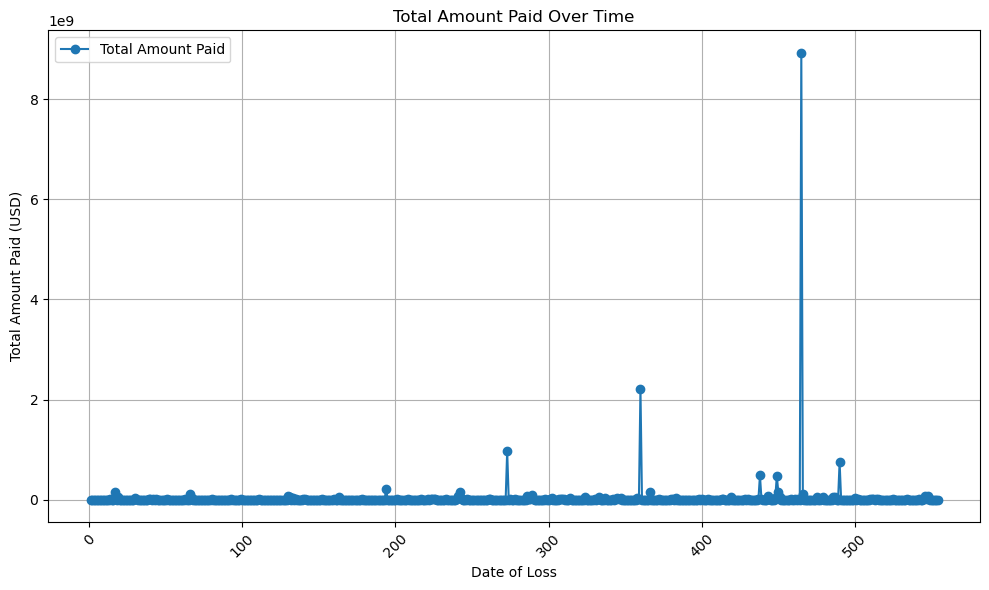

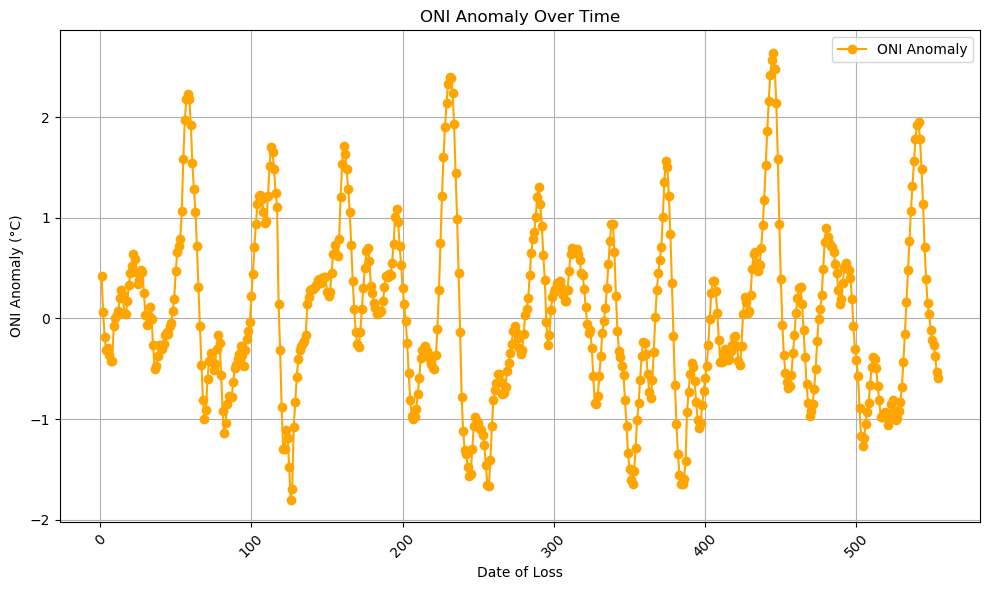

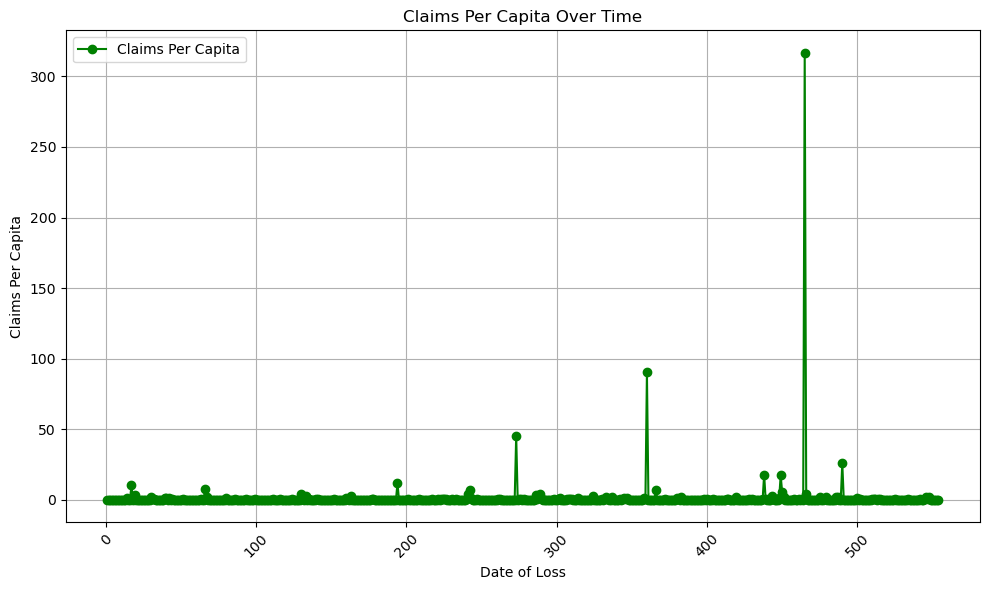

OSError: Cannot save file into a non-existent directory: '../data'

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

plt.plot(df.index, df['totalAmountPaid'], marker='o', label='Total Amount Paid')
plt.xlabel('Date of Loss')
plt.ylabel('Total Amount Paid (USD)')
plt.title('Total Amount Paid Over Time')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['ONI_Anomaly'], marker='o', color='orange', label='ONI Anomaly')
plt.xlabel('Date of Loss')
plt.ylabel('ONI Anomaly (°C)')
plt.title('ONI Anomaly Over Time')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['claimsPerCapita'], marker='o', color='green', label='Claims Per Capita')
plt.xlabel('Date of Loss')
plt.ylabel('Claims Per Capita')
plt.title('Claims Per Capita Over Time')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

relevant_columns = df[['totalAmountPaid', 'ONI_Total', 'ONI_Anomaly', 'Resident Population', 'claimsPerCapita']]
relevant_columns.to_csv("../data/processed_flood_analysis_data.csv", index=False)

In [13]:
df.set_index('dateOfLoss', inplace=True)

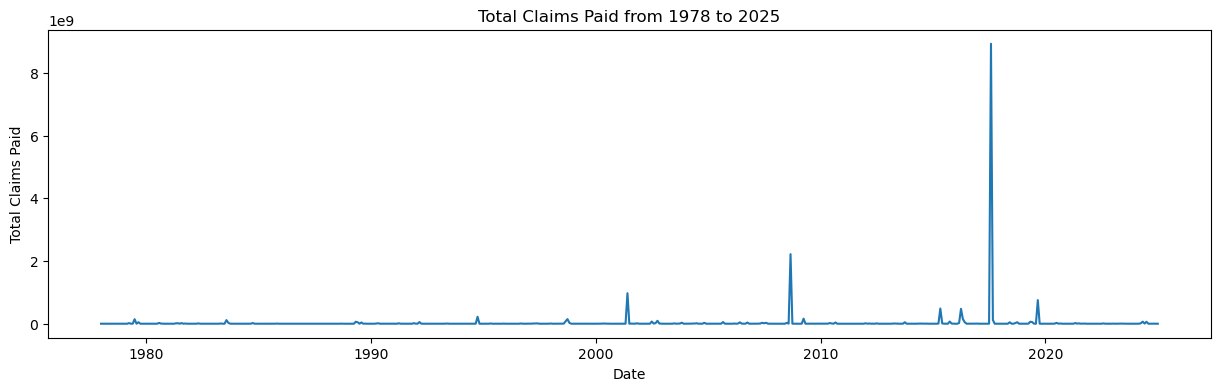

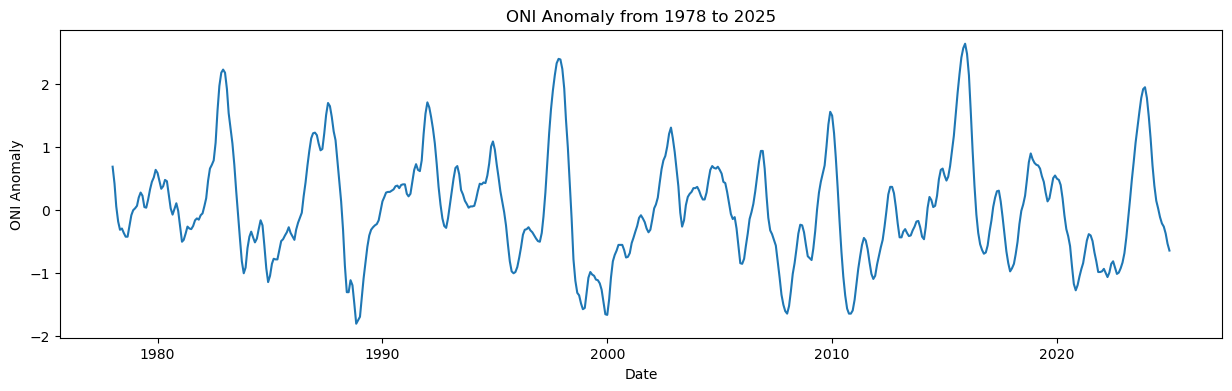

In [15]:
df['stationary_claimsPerCapita'] = np.log(df['claimsPerCapita']).diff().dropna()
def plot_df(df, x, y, title="", xlabel = 'Date', ylabel='', dpi=100, color=''):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='tab:blue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=title[:-18], facecolor='white')
    plt.show()
    
plot_df(df, x=df.index, y=df['totalAmountPaid'], title='Total Claims Paid from 1978 to 2025')
plot_df(df, x=df.index, y=df['ONI_Anomaly'], title='ONI Anomaly from 1978 to 2025')

In [16]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries):
    result = adfuller(timeseries, autolag='AIC')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')

# Example usage:
print("ClaimsPerCaita Stationary Test")
adf_test(df['stationary_claimsPerCapita'])

print("ONI Anomaly Stationary Test")
adf_test(df['ONI_Anomaly'])

ClaimsPerCaita Stationary Test


MissingDataError: exog contains inf or nans

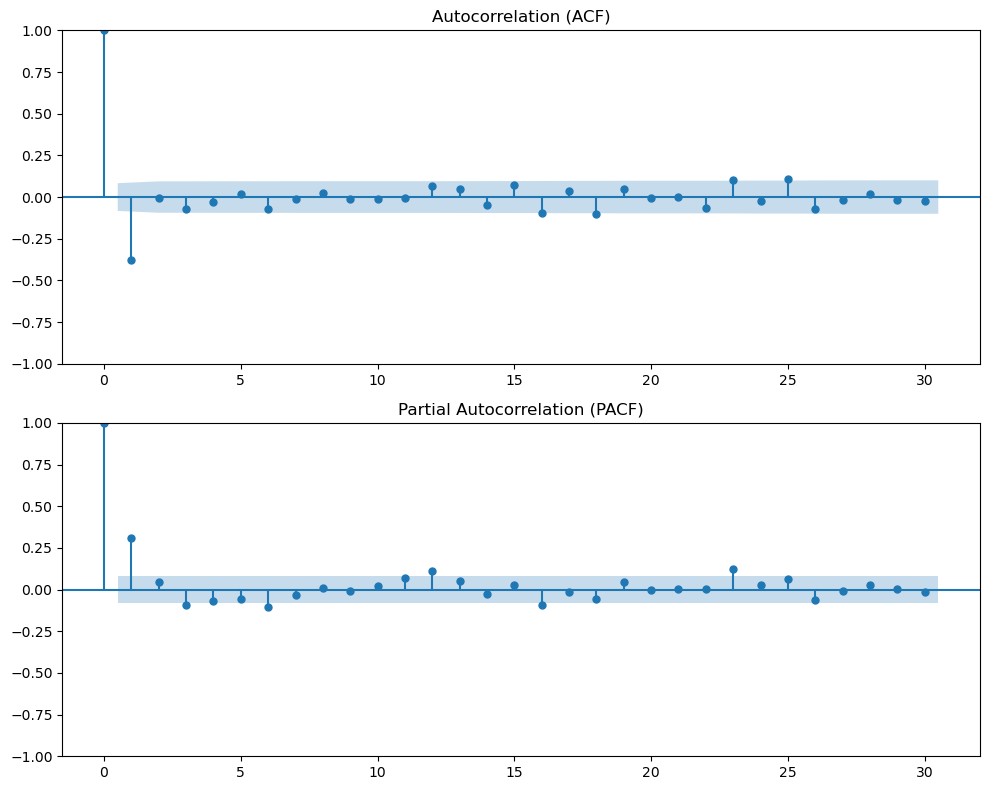

In [8]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(2, 1, figsize=(10, 8))
difft = df['stationary_claimsPerCapita'].diff().dropna()
# ACF Plot
plot_acf(difft, ax=axes[0], lags=30)
axes[0].set_title('Autocorrelation (ACF)')

# PACF Plot
plot_pacf(df['stationary_claimsPerCapita'], ax=axes[1], lags=30, method='ywm')
axes[1].set_title('Partial Autocorrelation (PACF)')

plt.tight_layout()
plt.show()

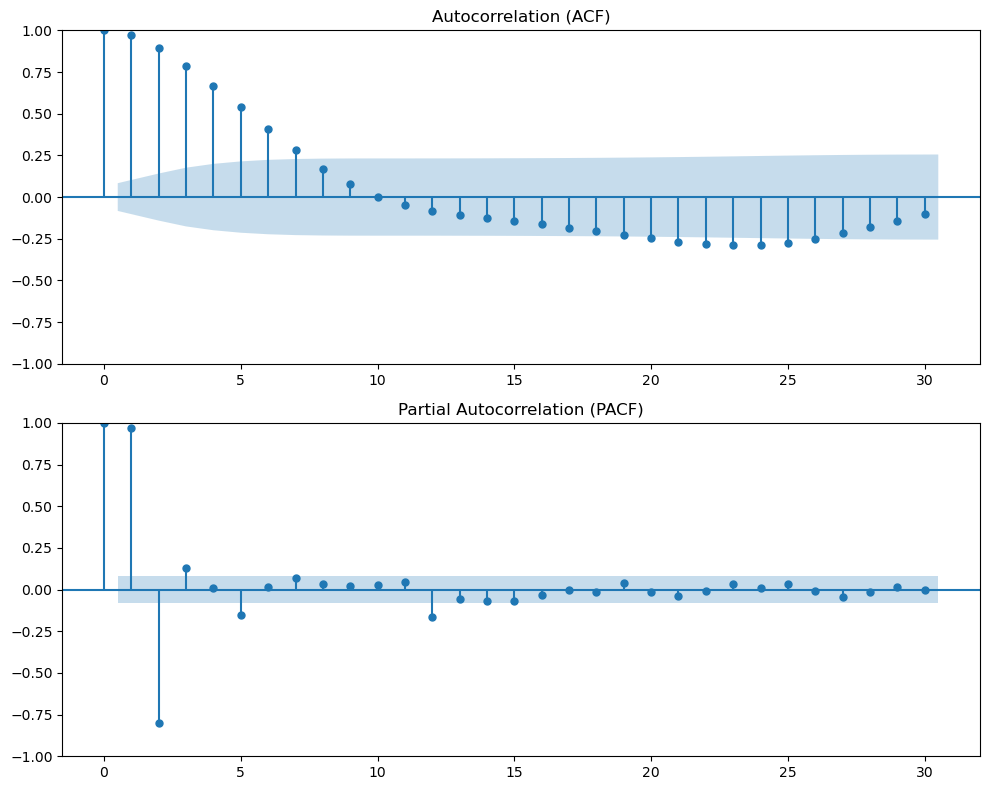

In [9]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# ACF Plot
plot_acf(df['ONI_Anomaly'], ax=axes[0], lags=30)
axes[0].set_title('Autocorrelation (ACF)')

# PACF Plot
plot_pacf(df['ONI_Anomaly'], ax=axes[1], lags=30, method='ywm')
axes[1].set_title('Partial Autocorrelation (PACF)')

plt.tight_layout()
plt.show()